In [29]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [30]:
cancer_df.target.value_counts() # 타겟 밸류 갯수 확인

1    357
0    212
Name: target, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_features , y_label,
                                                   test_size = 0.2,
                                                   random_state = 156)
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


In [41]:
## 평가함수 만들기

from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬:\n',confusion)
    print('정확도:{:.4f},정밀도:{:.4f},재현율:{:.4f},F1:{:.4f}, \
          AUC:{:.4f}'.format(accuracy,precision,recall,f1,roc_auc))
    
    

In [53]:
from xgboost import XGBClassifier

evals = [(X_test,y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,max_depth=3)   ##estimator, estimators 다름..

xgb_wrapper.fit(X_train,y_train, early_stopping_rounds = 400, eval_set = evals, eval_metric='logloss',\
    verbose=True)

ws400_pred = xgb_wrapper.predict(X_test)
ws400_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [42]:
get_clf_eval(y_test,ws400_pred, ws400_pred_proba)

오차행렬:
 [[34  3]
 [ 2 75]]
정확도:0.9561,정밀도:0.9615,재현율:0.9740,F1:0.9677,           AUC:0.9947


In [47]:
from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate=0.1,
                           max_depth = 3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100, 
                eval_set=evals, eval_metric='logloss',verbose=True)
ws100_pred = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [48]:
get_clf_eval(y_test,ws100_pred, ws100_pred_proba)

오차행렬:
 [[34  3]
 [ 1 76]]
정확도:0.9649,정밀도:0.9620,재현율:0.9870,F1:0.9744,           AUC:0.9954


In [51]:
evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate=0.1,
                           max_depth = 3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=10, 
                eval_set=evals, eval_metric='logloss',verbose=True)
ws10_pred = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test,ws10_pred,ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

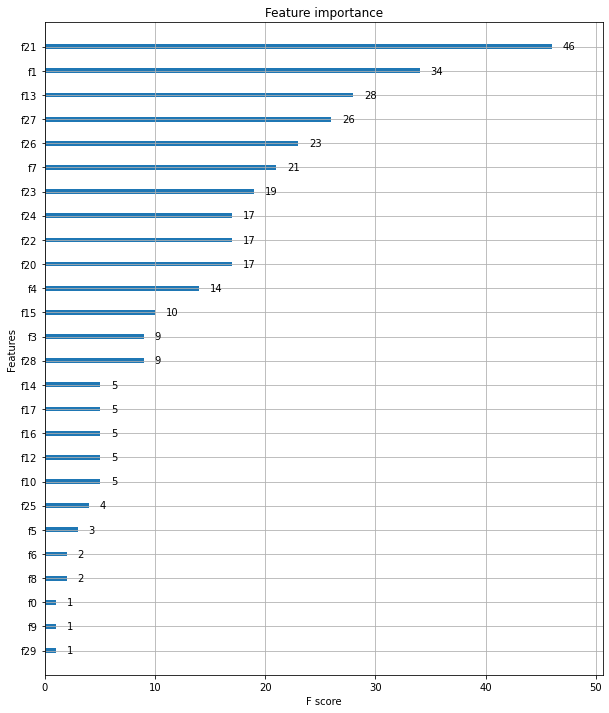

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=ax)

In [55]:
from lightgbm import LGBMClassifier

dataset = load_breast_cancer()

ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target,
                                                   test_size=0.2,
                                                   random_state = 156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

lgbm_wrapper.fit(X_train,y_train, early_stopping_rounds=100,
                eval_metric = 'logloss', eval_set = [(X_test,y_test)],verbose=True)

preds = lgbm_wrapper.predict(X_test)
preds_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [56]:
get_clf_eval(y_test, preds, preds_proba)

오차행렬:
 [[33  4]
 [ 1 76]]
정확도:0.9561,정밀도:0.9500,재현율:0.9870,F1:0.9682,           AUC:0.9905


[과제] - 캐글 산탄데르 고객 만족 예측

Q. 산탄데르 은행의 고객만족 예측 분석을 수행하세요.

370개의 피처로 주어진 데이터 세트
클래스 레이블명은 target 1이 불만, 0은 만족
모델의 성능 평가는 ROC_AUC
데이터는 https://www.kaggle.com/c/santander-customer-satisfaction/data

In [92]:
df = pd.read_csv('dataset/santander/train.csv')

In [93]:
df.describe()  ## var3 -999999 이상치 확인 => 제일 많은 값으로 대체

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [94]:
df.var3.value_counts() # 2가 가장 많음. 116개의 -999999 2로 대체

df.var3.replace(-999999,2,inplace=True)
df.drop('ID',axis=1,inplace=True) # 필요없는 ID 칼럼 제거

In [95]:
# target의 비율 확인

cus_normal = df.TARGET.value_counts()[1]
print('불만 고객 비중',round(cus_normal / df.TARGET.count(),2))


불만 고객 비중 0.04


In [96]:
y = df.TARGET
X = df.drop('TARGET',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=0, stratify=y)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape,X_test.shape)
print('학습 분포 비율:\n',y_train.value_counts()/train_cnt)
print('\n 테스트 분포 비율:\n', y_test.value_counts()/test_cnt)

(60816, 369) (15204, 369)
학습 분포 비율:
 0    0.960438
1    0.039562
Name: TARGET, dtype: float64

 테스트 분포 비율:
 0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [85]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train,y_train, early_stopping_rounds=100, eval_metric = 'auc',
           eval_set = [(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print(xgb_roc_score)

[0]	validation_0-auc:0.82569	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88674	validation_1-auc:0.82453
[18]	validation_0-au

In [86]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

#파라미터 설정
params = {'max_depth':[5,7],'min_child_weight':[1,3],
         'colsample_bytree':[0.5,0.75]}

gridcv = GridSearchCV(xgb_clf,param_grid=params,cv=3)

gridcv.fit(X_train,y_train,early_stopping_rounds=30,
           eval_metric='auc',
          eval_set=[(X_train,y_train),(X_test,y_test)])

print('GV 최적 파라미터:', gridcv.best_params_)

# roc_auc 스코어
xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1])
print('AUC:{:.4f}'.format(xgb_roc_score))



[0]	validation_0-auc:0.81018	validation_1-auc:0.78188
[1]	validation_0-auc:0.82545	validation_1-auc:0.79768
[2]	validation_0-auc:0.83140	validation_1-auc:0.80216
[3]	validation_0-auc:0.83516	validation_1-auc:0.80198
[4]	validation_0-auc:0.83771	validation_1-auc:0.80505
[5]	validation_0-auc:0.84300	validation_1-auc:0.81035
[6]	validation_0-auc:0.84062	validation_1-auc:0.80790
[7]	validation_0-auc:0.84891	validation_1-auc:0.81507
[8]	validation_0-auc:0.85188	validation_1-auc:0.81522
[9]	validation_0-auc:0.85270	validation_1-auc:0.81168
[10]	validation_0-auc:0.85247	validation_1-auc:0.80830
[11]	validation_0-auc:0.85177	validation_1-auc:0.80637
[12]	validation_0-auc:0.85755	validation_1-auc:0.81189
[13]	validation_0-auc:0.86086	validation_1-auc:0.81561
[14]	validation_0-auc:0.86280	validation_1-auc:0.81838
[15]	validation_0-auc:0.86444	validation_1-auc:0.81759
[16]	validation_0-auc:0.86525	validation_1-auc:0.81930
[17]	validation_0-auc:0.86676	validation_1-auc:0.82054
[18]	validation_0-au

[33]	validation_0-auc:0.87650	validation_1-auc:0.81592
[34]	validation_0-auc:0.87670	validation_1-auc:0.81603
[35]	validation_0-auc:0.87694	validation_1-auc:0.81586
[36]	validation_0-auc:0.87715	validation_1-auc:0.81558
[37]	validation_0-auc:0.87735	validation_1-auc:0.81523
[38]	validation_0-auc:0.87844	validation_1-auc:0.81549
[39]	validation_0-auc:0.87922	validation_1-auc:0.81505
[40]	validation_0-auc:0.87920	validation_1-auc:0.81484
[41]	validation_0-auc:0.88020	validation_1-auc:0.81441
[42]	validation_0-auc:0.88077	validation_1-auc:0.81392
[43]	validation_0-auc:0.88088	validation_1-auc:0.81404
[44]	validation_0-auc:0.88135	validation_1-auc:0.81364
[45]	validation_0-auc:0.88161	validation_1-auc:0.81319
[46]	validation_0-auc:0.88176	validation_1-auc:0.81332
[0]	validation_0-auc:0.81016	validation_1-auc:0.78166
[1]	validation_0-auc:0.82562	validation_1-auc:0.79846
[2]	validation_0-auc:0.83298	validation_1-auc:0.80352
[3]	validation_0-auc:0.83448	validation_1-auc:0.80464
[4]	validation

[23]	validation_0-auc:0.86906	validation_1-auc:0.82028
[24]	validation_0-auc:0.86951	validation_1-auc:0.81991
[25]	validation_0-auc:0.86963	validation_1-auc:0.81990
[26]	validation_0-auc:0.87078	validation_1-auc:0.81925
[27]	validation_0-auc:0.87104	validation_1-auc:0.81882
[28]	validation_0-auc:0.87171	validation_1-auc:0.81836
[29]	validation_0-auc:0.87273	validation_1-auc:0.81932
[30]	validation_0-auc:0.87281	validation_1-auc:0.81926
[31]	validation_0-auc:0.87374	validation_1-auc:0.82030
[32]	validation_0-auc:0.87392	validation_1-auc:0.82022
[33]	validation_0-auc:0.87423	validation_1-auc:0.82050
[34]	validation_0-auc:0.87513	validation_1-auc:0.82077
[35]	validation_0-auc:0.87548	validation_1-auc:0.82013
[36]	validation_0-auc:0.87611	validation_1-auc:0.81931
[37]	validation_0-auc:0.87627	validation_1-auc:0.81918
[38]	validation_0-auc:0.87710	validation_1-auc:0.81904
[39]	validation_0-auc:0.87730	validation_1-auc:0.81932
[40]	validation_0-auc:0.87756	validation_1-auc:0.81907
[41]	valid

[20]	validation_0-auc:0.88826	validation_1-auc:0.81341
[21]	validation_0-auc:0.88880	validation_1-auc:0.81284
[22]	validation_0-auc:0.88992	validation_1-auc:0.81310
[23]	validation_0-auc:0.89089	validation_1-auc:0.81412
[24]	validation_0-auc:0.89129	validation_1-auc:0.81408
[25]	validation_0-auc:0.89188	validation_1-auc:0.81428
[26]	validation_0-auc:0.89345	validation_1-auc:0.81398
[27]	validation_0-auc:0.89403	validation_1-auc:0.81415
[28]	validation_0-auc:0.89406	validation_1-auc:0.81363
[29]	validation_0-auc:0.89430	validation_1-auc:0.81354
[30]	validation_0-auc:0.89492	validation_1-auc:0.81287
[31]	validation_0-auc:0.89536	validation_1-auc:0.81184
[32]	validation_0-auc:0.89589	validation_1-auc:0.81149
[33]	validation_0-auc:0.89605	validation_1-auc:0.81166
[34]	validation_0-auc:0.89670	validation_1-auc:0.81195
[0]	validation_0-auc:0.81917	validation_1-auc:0.79054
[1]	validation_0-auc:0.83371	validation_1-auc:0.80237
[2]	validation_0-auc:0.83966	validation_1-auc:0.80628
[3]	validatio

[34]	validation_0-auc:0.88824	validation_1-auc:0.81491
[35]	validation_0-auc:0.88866	validation_1-auc:0.81474
[36]	validation_0-auc:0.88892	validation_1-auc:0.81443
[37]	validation_0-auc:0.88913	validation_1-auc:0.81384
[38]	validation_0-auc:0.89003	validation_1-auc:0.81332
[39]	validation_0-auc:0.89094	validation_1-auc:0.81239
[40]	validation_0-auc:0.89149	validation_1-auc:0.81224
[41]	validation_0-auc:0.89173	validation_1-auc:0.81155
[42]	validation_0-auc:0.89184	validation_1-auc:0.81089
[43]	validation_0-auc:0.89229	validation_1-auc:0.81159
[44]	validation_0-auc:0.89258	validation_1-auc:0.81194
[45]	validation_0-auc:0.89274	validation_1-auc:0.81197
[46]	validation_0-auc:0.89323	validation_1-auc:0.81175
[47]	validation_0-auc:0.89336	validation_1-auc:0.81125
[48]	validation_0-auc:0.89415	validation_1-auc:0.80987
[0]	validation_0-auc:0.81858	validation_1-auc:0.78761
[1]	validation_0-auc:0.82302	validation_1-auc:0.79326
[2]	validation_0-auc:0.83321	validation_1-auc:0.80485
[3]	validatio

[26]	validation_0-auc:0.87298	validation_1-auc:0.81779
[27]	validation_0-auc:0.87342	validation_1-auc:0.81777
[28]	validation_0-auc:0.87371	validation_1-auc:0.81761
[29]	validation_0-auc:0.87390	validation_1-auc:0.81768
[30]	validation_0-auc:0.87412	validation_1-auc:0.81781
[31]	validation_0-auc:0.87510	validation_1-auc:0.81668
[32]	validation_0-auc:0.87583	validation_1-auc:0.81674
[33]	validation_0-auc:0.87617	validation_1-auc:0.81656
[34]	validation_0-auc:0.87637	validation_1-auc:0.81651
[35]	validation_0-auc:0.87700	validation_1-auc:0.81610
[36]	validation_0-auc:0.87743	validation_1-auc:0.81545
[37]	validation_0-auc:0.87789	validation_1-auc:0.81503
[38]	validation_0-auc:0.87829	validation_1-auc:0.81376
[39]	validation_0-auc:0.87868	validation_1-auc:0.81375
[40]	validation_0-auc:0.88004	validation_1-auc:0.81407
[41]	validation_0-auc:0.88029	validation_1-auc:0.81347
[42]	validation_0-auc:0.88081	validation_1-auc:0.81338
[43]	validation_0-auc:0.88097	validation_1-auc:0.81332
[44]	valid

[21]	validation_0-auc:0.86728	validation_1-auc:0.81867
[22]	validation_0-auc:0.86766	validation_1-auc:0.81881
[23]	validation_0-auc:0.86825	validation_1-auc:0.81862
[24]	validation_0-auc:0.86841	validation_1-auc:0.81860
[25]	validation_0-auc:0.86864	validation_1-auc:0.81829
[26]	validation_0-auc:0.87021	validation_1-auc:0.81811
[27]	validation_0-auc:0.87084	validation_1-auc:0.81792
[28]	validation_0-auc:0.87109	validation_1-auc:0.81805
[29]	validation_0-auc:0.87130	validation_1-auc:0.81754
[30]	validation_0-auc:0.87168	validation_1-auc:0.81745
[31]	validation_0-auc:0.87224	validation_1-auc:0.81703
[32]	validation_0-auc:0.87288	validation_1-auc:0.81644
[33]	validation_0-auc:0.87317	validation_1-auc:0.81599
[34]	validation_0-auc:0.87376	validation_1-auc:0.81605
[35]	validation_0-auc:0.87424	validation_1-auc:0.81535
[36]	validation_0-auc:0.87449	validation_1-auc:0.81548
[37]	validation_0-auc:0.87501	validation_1-auc:0.81500
[0]	validation_0-auc:0.82530	validation_1-auc:0.79157
[1]	validat

[33]	validation_0-auc:0.89511	validation_1-auc:0.81136
[34]	validation_0-auc:0.89548	validation_1-auc:0.81144
[35]	validation_0-auc:0.89569	validation_1-auc:0.81111
[36]	validation_0-auc:0.89680	validation_1-auc:0.81057
[37]	validation_0-auc:0.89705	validation_1-auc:0.81036
[38]	validation_0-auc:0.89836	validation_1-auc:0.80991
[0]	validation_0-auc:0.82371	validation_1-auc:0.79441
[1]	validation_0-auc:0.83219	validation_1-auc:0.79713
[2]	validation_0-auc:0.83924	validation_1-auc:0.80071
[3]	validation_0-auc:0.84164	validation_1-auc:0.80063
[4]	validation_0-auc:0.84779	validation_1-auc:0.80814
[5]	validation_0-auc:0.85254	validation_1-auc:0.81182
[6]	validation_0-auc:0.85837	validation_1-auc:0.81536
[7]	validation_0-auc:0.86045	validation_1-auc:0.81644
[8]	validation_0-auc:0.86396	validation_1-auc:0.81603
[9]	validation_0-auc:0.86661	validation_1-auc:0.81434
[10]	validation_0-auc:0.86841	validation_1-auc:0.81200
[11]	validation_0-auc:0.86837	validation_1-auc:0.81087
[12]	validation_0-au

[9]	validation_0-auc:0.87595	validation_1-auc:0.82066
[10]	validation_0-auc:0.87905	validation_1-auc:0.81807
[11]	validation_0-auc:0.87955	validation_1-auc:0.81437
[12]	validation_0-auc:0.88382	validation_1-auc:0.81954
[13]	validation_0-auc:0.88735	validation_1-auc:0.82120
[14]	validation_0-auc:0.88991	validation_1-auc:0.82252
[15]	validation_0-auc:0.89236	validation_1-auc:0.82231
[16]	validation_0-auc:0.89355	validation_1-auc:0.82367
[17]	validation_0-auc:0.89559	validation_1-auc:0.82306
[18]	validation_0-auc:0.89618	validation_1-auc:0.82374
[19]	validation_0-auc:0.89700	validation_1-auc:0.82346
[20]	validation_0-auc:0.89746	validation_1-auc:0.82414
[21]	validation_0-auc:0.89945	validation_1-auc:0.82335
[22]	validation_0-auc:0.90146	validation_1-auc:0.82425
[23]	validation_0-auc:0.90202	validation_1-auc:0.82373
[24]	validation_0-auc:0.90239	validation_1-auc:0.82396
[25]	validation_0-auc:0.90262	validation_1-auc:0.82353
[26]	validation_0-auc:0.90279	validation_1-auc:0.82325
[27]	valida

In [87]:
xgb_clf = XGBClassifier(n_estimators=1000,random_state=156,
                       max_depth=7,min_child_weight=3,
                        colsample_bytree=0.75, reg_alpha=0.03)


xgb_clf.fit(X_train,y_train,early_stopping_rounds=200,
            eval_metric="auc",eval_set=[(X_train,y_train),(X_test,y_test)])


xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('AUC:{:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73966	validation_1-auc:0.70489
[1]	validation_0-auc:0.83500	validation_1-auc:0.79750
[2]	validation_0-auc:0.83669	validation_1-auc:0.78756
[3]	validation_0-auc:0.83638	validation_1-auc:0.78505
[4]	validation_0-auc:0.85222	validation_1-auc:0.80194
[5]	validation_0-auc:0.86017	validation_1-auc:0.81014
[6]	validation_0-auc:0.86660	validation_1-auc:0.81525
[7]	validation_0-auc:0.87079	validation_1-auc:0.81927
[8]	validation_0-auc:0.87419	validation_1-auc:0.82289
[9]	validation_0-auc:0.87583	validation_1-auc:0.81960
[10]	validation_0-auc:0.87953	validation_1-auc:0.82088
[11]	validation_0-auc:0.88246	validation_1-auc:0.81878
[12]	validation_0-auc:0.88607	validation_1-auc:0.82194
[13]	validation_0-auc:0.88759	validation_1-auc:0.82160
[14]	validation_0-auc:0.89008	validation_1-auc:0.82296
[15]	validation_0-auc:0.89157	validation_1-auc:0.82434
[16]	validation_0-auc:0.89256	validation_1-auc:0.82543
[17]	validation_0-auc:0.89442	validation_1-auc:0.82490
[18]	validation_0-au

[149]	validation_0-auc:0.94970	validation_1-auc:0.79704
[150]	validation_0-auc:0.94977	validation_1-auc:0.79674
[151]	validation_0-auc:0.94989	validation_1-auc:0.79676
[152]	validation_0-auc:0.94999	validation_1-auc:0.79680
[153]	validation_0-auc:0.95001	validation_1-auc:0.79673
[154]	validation_0-auc:0.95003	validation_1-auc:0.79654
[155]	validation_0-auc:0.95004	validation_1-auc:0.79641
[156]	validation_0-auc:0.95040	validation_1-auc:0.79613
[157]	validation_0-auc:0.95094	validation_1-auc:0.79574
[158]	validation_0-auc:0.95096	validation_1-auc:0.79588
[159]	validation_0-auc:0.95113	validation_1-auc:0.79544
[160]	validation_0-auc:0.95117	validation_1-auc:0.79521
[161]	validation_0-auc:0.95130	validation_1-auc:0.79502
[162]	validation_0-auc:0.95192	validation_1-auc:0.79492
[163]	validation_0-auc:0.95244	validation_1-auc:0.79509
[164]	validation_0-auc:0.95250	validation_1-auc:0.79488
[165]	validation_0-auc:0.95261	validation_1-auc:0.79469
[166]	validation_0-auc:0.95291	validation_1-auc:

In [98]:
from lightgbm import LGBMClassifier


y = df.TARGET
X = df.drop('TARGET',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2 , random_state=0)

evals = [(X_test,y_test)]

lgbm_clf = LGBMClassifier(n_estimators=300)

lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_set = evals, eval_metric = 'logloss', verbose=True)

[1]	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.160006
[3]	valid_0's binary_logloss: 0.156323
[4]	valid_0's binary_logloss: 0.153463
[5]	valid_0's binary_logloss: 0.151256
[6]	valid_0's binary_logloss: 0.149427
[7]	valid_0's binary_logloss: 0.147961
[8]	valid_0's binary_logloss: 0.146591
[9]	valid_0's binary_logloss: 0.145455
[10]	valid_0's binary_logloss: 0.144486
[11]	valid_0's binary_logloss: 0.143769
[12]	valid_0's binary_logloss: 0.143146
[13]	valid_0's binary_logloss: 0.142533
[14]	valid_0's binary_logloss: 0.142036
[15]	valid_0's binary_logloss: 0.14161
[16]	valid_0's binary_logloss: 0.141307
[17]	valid_0's binary_logloss: 0.141152
[18]	valid_0's binary_logloss: 0.141018
[19]	valid_0's binary_logloss: 0.14068
[20]	valid_0's binary_logloss: 0.140562
[21]	valid_0's binary_logloss: 0.140353
[22]	valid_0's binary_logloss: 0.140144
[23]	valid_0's binary_logloss: 0.139983
[24]	valid_0's binary_logloss

LGBMClassifier(n_estimators=300)

In [109]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

arams = {'max_depth':[5,7,10],'min_child_weight':[1,3,5],
         'colsample_bytree':[0.5,0.75,1]}

gscv = GridSearchCV(lgbm_clf, param_grid = params, cv=3 , refit=True)

gscv.fit(X_train,y_train, early_stopping_rounds=50,
        eval_metric = 'auc', eval_set = [(X_train,y_train),(X_test,y_test)])

print("best_params : ", gscv.best_params_)

lgbm_roc_score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1], average= 'macro')

print()
print('ROC_AUC_SCORE : {:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.812315	valid_0's binary_logloss: 0.157368	valid_1's auc: 0.809758	valid_1's binary_logloss: 0.166047
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.831381	valid_0's binary_logloss: 0.152503	valid_1's auc: 0.823535	valid_1's binary_logloss: 0.16127
[3]	valid_0's auc: 0.835511	valid_0's binary_logloss: 0.14899	valid_1's auc: 0.827449	valid_1's binary_logloss: 0.157607
[4]	valid_0's auc: 0.836634	valid_0's binary_logloss: 0.147375	valid_1's auc: 0.833144	valid_1's binary_logloss: 0.156065
[5]	valid_0's auc: 0.842171	valid_0's binary_logloss: 0.144576	valid_1's auc: 0.835879	valid_1's binary_logloss: 0.153287
[6]	valid_0's auc: 0.842825	valid_0's binary_logloss: 0.142599	valid_1's auc: 0.835531	valid_1's binary_logloss: 0.151252
[7]	valid_0's auc: 0.844832	valid_0's binary_logloss: 0.141298	valid_1's auc: 0.835456	valid_1's binary_logloss: 0.1502
[8]	valid_0's auc: 0.846333	valid_0's binary_logloss: 0.139684	valid_1's auc: 0.836302	va

[1]	valid_0's auc: 0.813337	valid_0's binary_logloss: 0.157957	valid_1's auc: 0.814953	valid_1's binary_logloss: 0.166223
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.806945	valid_0's binary_logloss: 0.155159	valid_1's auc: 0.806948	valid_1's binary_logloss: 0.163743
[3]	valid_0's auc: 0.813652	valid_0's binary_logloss: 0.152479	valid_1's auc: 0.810057	valid_1's binary_logloss: 0.161104
[4]	valid_0's auc: 0.814991	valid_0's binary_logloss: 0.150552	valid_1's auc: 0.809886	valid_1's binary_logloss: 0.159142
[5]	valid_0's auc: 0.831857	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.82597	valid_1's binary_logloss: 0.155465
[6]	valid_0's auc: 0.832186	valid_0's binary_logloss: 0.145091	valid_1's auc: 0.825465	valid_1's binary_logloss: 0.153904
[7]	valid_0's auc: 0.838206	valid_0's binary_logloss: 0.142723	valid_1's auc: 0.831503	valid_1's binary_logloss: 0.151567
[8]	valid_0's auc: 0.843528	valid_0's binary_logloss: 0.140752	valid_1's auc: 0.835782

[77]	valid_0's auc: 0.875821	valid_0's binary_logloss: 0.122877	valid_1's auc: 0.841166	valid_1's binary_logloss: 0.138882
[78]	valid_0's auc: 0.876032	valid_0's binary_logloss: 0.122775	valid_1's auc: 0.841067	valid_1's binary_logloss: 0.13889
[79]	valid_0's auc: 0.87614	valid_0's binary_logloss: 0.122723	valid_1's auc: 0.841122	valid_1's binary_logloss: 0.138897
[80]	valid_0's auc: 0.876196	valid_0's binary_logloss: 0.122683	valid_1's auc: 0.841016	valid_1's binary_logloss: 0.138919
[81]	valid_0's auc: 0.87621	valid_0's binary_logloss: 0.122655	valid_1's auc: 0.840954	valid_1's binary_logloss: 0.138963
[82]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.122529	valid_1's auc: 0.840939	valid_1's binary_logloss: 0.138965
[83]	valid_0's auc: 0.876659	valid_0's binary_logloss: 0.122462	valid_1's auc: 0.841048	valid_1's binary_logloss: 0.138948
[84]	valid_0's auc: 0.876693	valid_0's binary_logloss: 0.122443	valid_1's auc: 0.84108	valid_1's binary_logloss: 0.138935
[85]	valid_0's auc: 

[59]	valid_0's auc: 0.872133	valid_0's binary_logloss: 0.124343	valid_1's auc: 0.84276	valid_1's binary_logloss: 0.138773
[60]	valid_0's auc: 0.872181	valid_0's binary_logloss: 0.12432	valid_1's auc: 0.84275	valid_1's binary_logloss: 0.138772
[61]	valid_0's auc: 0.872218	valid_0's binary_logloss: 0.124306	valid_1's auc: 0.842789	valid_1's binary_logloss: 0.13878
[62]	valid_0's auc: 0.872241	valid_0's binary_logloss: 0.124293	valid_1's auc: 0.842857	valid_1's binary_logloss: 0.138787
[63]	valid_0's auc: 0.872271	valid_0's binary_logloss: 0.124275	valid_1's auc: 0.842862	valid_1's binary_logloss: 0.138795
[64]	valid_0's auc: 0.872447	valid_0's binary_logloss: 0.12422	valid_1's auc: 0.842947	valid_1's binary_logloss: 0.138782
[65]	valid_0's auc: 0.872582	valid_0's binary_logloss: 0.124172	valid_1's auc: 0.842839	valid_1's binary_logloss: 0.138782
[66]	valid_0's auc: 0.873054	valid_0's binary_logloss: 0.123983	valid_1's auc: 0.842784	valid_1's binary_logloss: 0.138807
[67]	valid_0's auc: 0

[45]	valid_0's auc: 0.862945	valid_0's binary_logloss: 0.127778	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139414
[46]	valid_0's auc: 0.863038	valid_0's binary_logloss: 0.127739	valid_1's auc: 0.838838	valid_1's binary_logloss: 0.139422
[47]	valid_0's auc: 0.863275	valid_0's binary_logloss: 0.127674	valid_1's auc: 0.838764	valid_1's binary_logloss: 0.139405
[48]	valid_0's auc: 0.863463	valid_0's binary_logloss: 0.12763	valid_1's auc: 0.838474	valid_1's binary_logloss: 0.13946
[49]	valid_0's auc: 0.86366	valid_0's binary_logloss: 0.12752	valid_1's auc: 0.838601	valid_1's binary_logloss: 0.13941
[50]	valid_0's auc: 0.86367	valid_0's binary_logloss: 0.127498	valid_1's auc: 0.838526	valid_1's binary_logloss: 0.139412
[51]	valid_0's auc: 0.863768	valid_0's binary_logloss: 0.127466	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.139416
[52]	valid_0's auc: 0.863881	valid_0's binary_logloss: 0.127444	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139437
[53]	valid_0's auc: 0.8

[48]	valid_0's auc: 0.865807	valid_0's binary_logloss: 0.126463	valid_1's auc: 0.844985	valid_1's binary_logloss: 0.138156
[49]	valid_0's auc: 0.866152	valid_0's binary_logloss: 0.126354	valid_1's auc: 0.845314	valid_1's binary_logloss: 0.138072
[50]	valid_0's auc: 0.866303	valid_0's binary_logloss: 0.126306	valid_1's auc: 0.845346	valid_1's binary_logloss: 0.138057
[51]	valid_0's auc: 0.866339	valid_0's binary_logloss: 0.126278	valid_1's auc: 0.845348	valid_1's binary_logloss: 0.138058
[52]	valid_0's auc: 0.8665	valid_0's binary_logloss: 0.126204	valid_1's auc: 0.845233	valid_1's binary_logloss: 0.138034
[53]	valid_0's auc: 0.866729	valid_0's binary_logloss: 0.126134	valid_1's auc: 0.845282	valid_1's binary_logloss: 0.137999
[54]	valid_0's auc: 0.867094	valid_0's binary_logloss: 0.126034	valid_1's auc: 0.844976	valid_1's binary_logloss: 0.138036
[55]	valid_0's auc: 0.867464	valid_0's binary_logloss: 0.125904	valid_1's auc: 0.844957	valid_1's binary_logloss: 0.138016
[56]	valid_0's auc

[39]	valid_0's auc: 0.863048	valid_0's binary_logloss: 0.127658	valid_1's auc: 0.844888	valid_1's binary_logloss: 0.138941
[40]	valid_0's auc: 0.863228	valid_0's binary_logloss: 0.127532	valid_1's auc: 0.844805	valid_1's binary_logloss: 0.138876
[41]	valid_0's auc: 0.863763	valid_0's binary_logloss: 0.12734	valid_1's auc: 0.844886	valid_1's binary_logloss: 0.138788
[42]	valid_0's auc: 0.863943	valid_0's binary_logloss: 0.127231	valid_1's auc: 0.844931	valid_1's binary_logloss: 0.138732
[43]	valid_0's auc: 0.864085	valid_0's binary_logloss: 0.127179	valid_1's auc: 0.845032	valid_1's binary_logloss: 0.138706
[44]	valid_0's auc: 0.864198	valid_0's binary_logloss: 0.127145	valid_1's auc: 0.844961	valid_1's binary_logloss: 0.138702
[45]	valid_0's auc: 0.86421	valid_0's binary_logloss: 0.127128	valid_1's auc: 0.845036	valid_1's binary_logloss: 0.138699
[46]	valid_0's auc: 0.864716	valid_0's binary_logloss: 0.126956	valid_1's auc: 0.845364	valid_1's binary_logloss: 0.13859
[47]	valid_0's auc:

[20]	valid_0's auc: 0.863594	valid_0's binary_logloss: 0.128597	valid_1's auc: 0.838289	valid_1's binary_logloss: 0.141594
[21]	valid_0's auc: 0.864238	valid_0's binary_logloss: 0.128315	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.141518
[22]	valid_0's auc: 0.864961	valid_0's binary_logloss: 0.127959	valid_1's auc: 0.837418	valid_1's binary_logloss: 0.141431
[23]	valid_0's auc: 0.865828	valid_0's binary_logloss: 0.127578	valid_1's auc: 0.837366	valid_1's binary_logloss: 0.141271
[24]	valid_0's auc: 0.866355	valid_0's binary_logloss: 0.12725	valid_1's auc: 0.837258	valid_1's binary_logloss: 0.141167
[25]	valid_0's auc: 0.867014	valid_0's binary_logloss: 0.126839	valid_1's auc: 0.837445	valid_1's binary_logloss: 0.140992
[26]	valid_0's auc: 0.868136	valid_0's binary_logloss: 0.126417	valid_1's auc: 0.837149	valid_1's binary_logloss: 0.140849
[27]	valid_0's auc: 0.868681	valid_0's binary_logloss: 0.126092	valid_1's auc: 0.836787	valid_1's binary_logloss: 0.140775
[28]	valid_0's au

[35]	valid_0's auc: 0.872987	valid_0's binary_logloss: 0.123883	valid_1's auc: 0.843698	valid_1's binary_logloss: 0.138673
[36]	valid_0's auc: 0.873452	valid_0's binary_logloss: 0.123686	valid_1's auc: 0.843484	valid_1's binary_logloss: 0.138603
[37]	valid_0's auc: 0.873978	valid_0's binary_logloss: 0.123506	valid_1's auc: 0.843362	valid_1's binary_logloss: 0.138544
[38]	valid_0's auc: 0.874435	valid_0's binary_logloss: 0.12333	valid_1's auc: 0.843362	valid_1's binary_logloss: 0.138541
[39]	valid_0's auc: 0.874548	valid_0's binary_logloss: 0.12328	valid_1's auc: 0.84333	valid_1's binary_logloss: 0.138549
[40]	valid_0's auc: 0.874831	valid_0's binary_logloss: 0.123211	valid_1's auc: 0.843007	valid_1's binary_logloss: 0.138596
[41]	valid_0's auc: 0.87522	valid_0's binary_logloss: 0.122998	valid_1's auc: 0.843076	valid_1's binary_logloss: 0.13849
[42]	valid_0's auc: 0.875516	valid_0's binary_logloss: 0.122849	valid_1's auc: 0.843203	valid_1's binary_logloss: 0.138435
[43]	valid_0's auc: 0

[17]	valid_0's auc: 0.856344	valid_0's binary_logloss: 0.131461	valid_1's auc: 0.833404	valid_1's binary_logloss: 0.143949
[18]	valid_0's auc: 0.856548	valid_0's binary_logloss: 0.13104	valid_1's auc: 0.83278	valid_1's binary_logloss: 0.14369
[19]	valid_0's auc: 0.858552	valid_0's binary_logloss: 0.130251	valid_1's auc: 0.83464	valid_1's binary_logloss: 0.143075
[20]	valid_0's auc: 0.859002	valid_0's binary_logloss: 0.129864	valid_1's auc: 0.834679	valid_1's binary_logloss: 0.142865
[21]	valid_0's auc: 0.859961	valid_0's binary_logloss: 0.129453	valid_1's auc: 0.834839	valid_1's binary_logloss: 0.142691
[22]	valid_0's auc: 0.862235	valid_0's binary_logloss: 0.128778	valid_1's auc: 0.835963	valid_1's binary_logloss: 0.142257
[23]	valid_0's auc: 0.864127	valid_0's binary_logloss: 0.12814	valid_1's auc: 0.837031	valid_1's binary_logloss: 0.141842
[24]	valid_0's auc: 0.86493	valid_0's binary_logloss: 0.127778	valid_1's auc: 0.836767	valid_1's binary_logloss: 0.141677
[25]	valid_0's auc: 0.

[90]	valid_0's auc: 0.888141	valid_0's binary_logloss: 0.117719	valid_1's auc: 0.83916	valid_1's binary_logloss: 0.139636
[91]	valid_0's auc: 0.888361	valid_0's binary_logloss: 0.117604	valid_1's auc: 0.839084	valid_1's binary_logloss: 0.139637
[92]	valid_0's auc: 0.888497	valid_0's binary_logloss: 0.117506	valid_1's auc: 0.838951	valid_1's binary_logloss: 0.139691
[93]	valid_0's auc: 0.888694	valid_0's binary_logloss: 0.117414	valid_1's auc: 0.838933	valid_1's binary_logloss: 0.139715
[94]	valid_0's auc: 0.888736	valid_0's binary_logloss: 0.117368	valid_1's auc: 0.838902	valid_1's binary_logloss: 0.139733
[95]	valid_0's auc: 0.889053	valid_0's binary_logloss: 0.117231	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139782
Early stopping, best iteration is:
[45]	valid_0's auc: 0.877375	valid_0's binary_logloss: 0.122495	valid_1's auc: 0.841787	valid_1's binary_logloss: 0.139309
[1]	valid_0's auc: 0.820423	valid_0's binary_logloss: 0.156697	valid_1's auc: 0.812981	valid_1's binary_l

[1]	valid_0's auc: 0.819667	valid_0's binary_logloss: 0.157337	valid_1's auc: 0.818002	valid_1's binary_logloss: 0.165649
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.818149	valid_0's binary_logloss: 0.154468	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.16289
[3]	valid_0's auc: 0.819206	valid_0's binary_logloss: 0.151714	valid_1's auc: 0.815371	valid_1's binary_logloss: 0.160248
[4]	valid_0's auc: 0.818985	valid_0's binary_logloss: 0.149721	valid_1's auc: 0.814312	valid_1's binary_logloss: 0.158267
[5]	valid_0's auc: 0.835124	valid_0's binary_logloss: 0.145974	valid_1's auc: 0.826042	valid_1's binary_logloss: 0.1548
[6]	valid_0's auc: 0.834516	valid_0's binary_logloss: 0.144206	valid_1's auc: 0.824922	valid_1's binary_logloss: 0.153238
[7]	valid_0's auc: 0.841332	valid_0's binary_logloss: 0.141807	valid_1's auc: 0.830656	valid_1's binary_logloss: 0.15084
[8]	valid_0's auc: 0.84662	valid_0's binary_logloss: 0.139778	valid_1's auc: 0.836113	val

[81]	valid_0's auc: 0.88139	valid_0's binary_logloss: 0.120645	valid_1's auc: 0.843499	valid_1's binary_logloss: 0.138058
[82]	valid_0's auc: 0.881484	valid_0's binary_logloss: 0.120593	valid_1's auc: 0.843449	valid_1's binary_logloss: 0.138068
[83]	valid_0's auc: 0.881614	valid_0's binary_logloss: 0.120546	valid_1's auc: 0.843458	valid_1's binary_logloss: 0.138075
[84]	valid_0's auc: 0.881723	valid_0's binary_logloss: 0.120507	valid_1's auc: 0.843339	valid_1's binary_logloss: 0.138106
[85]	valid_0's auc: 0.88178	valid_0's binary_logloss: 0.120474	valid_1's auc: 0.843261	valid_1's binary_logloss: 0.138113
[86]	valid_0's auc: 0.8818	valid_0's binary_logloss: 0.120441	valid_1's auc: 0.843232	valid_1's binary_logloss: 0.138107
[87]	valid_0's auc: 0.881942	valid_0's binary_logloss: 0.120342	valid_1's auc: 0.843272	valid_1's binary_logloss: 0.138127
[88]	valid_0's auc: 0.881929	valid_0's binary_logloss: 0.120331	valid_1's auc: 0.843269	valid_1's binary_logloss: 0.138149
[89]	valid_0's auc: 

[44]	valid_0's auc: 0.873299	valid_0's binary_logloss: 0.124048	valid_1's auc: 0.844758	valid_1's binary_logloss: 0.138422
[45]	valid_0's auc: 0.873443	valid_0's binary_logloss: 0.124004	valid_1's auc: 0.84465	valid_1's binary_logloss: 0.138453
[46]	valid_0's auc: 0.873905	valid_0's binary_logloss: 0.123816	valid_1's auc: 0.844776	valid_1's binary_logloss: 0.138377
[47]	valid_0's auc: 0.873979	valid_0's binary_logloss: 0.123759	valid_1's auc: 0.844823	valid_1's binary_logloss: 0.13838
[48]	valid_0's auc: 0.874158	valid_0's binary_logloss: 0.123678	valid_1's auc: 0.844817	valid_1's binary_logloss: 0.138373
[49]	valid_0's auc: 0.874331	valid_0's binary_logloss: 0.123624	valid_1's auc: 0.844744	valid_1's binary_logloss: 0.138367
[50]	valid_0's auc: 0.874742	valid_0's binary_logloss: 0.123426	valid_1's auc: 0.844859	valid_1's binary_logloss: 0.138309
[51]	valid_0's auc: 0.875019	valid_0's binary_logloss: 0.123336	valid_1's auc: 0.844697	valid_1's binary_logloss: 0.138302
[52]	valid_0's auc

[22]	valid_0's auc: 0.857352	valid_0's binary_logloss: 0.130073	valid_1's auc: 0.836549	valid_1's binary_logloss: 0.141365
[23]	valid_0's auc: 0.858002	valid_0's binary_logloss: 0.129791	valid_1's auc: 0.836245	valid_1's binary_logloss: 0.141213
[24]	valid_0's auc: 0.858762	valid_0's binary_logloss: 0.129462	valid_1's auc: 0.83669	valid_1's binary_logloss: 0.141079
[25]	valid_0's auc: 0.859501	valid_0's binary_logloss: 0.129199	valid_1's auc: 0.836725	valid_1's binary_logloss: 0.140937
[26]	valid_0's auc: 0.859968	valid_0's binary_logloss: 0.128994	valid_1's auc: 0.83689	valid_1's binary_logloss: 0.140796
[27]	valid_0's auc: 0.860275	valid_0's binary_logloss: 0.128835	valid_1's auc: 0.837131	valid_1's binary_logloss: 0.140671
[28]	valid_0's auc: 0.860925	valid_0's binary_logloss: 0.128607	valid_1's auc: 0.837114	valid_1's binary_logloss: 0.140627
[29]	valid_0's auc: 0.861434	valid_0's binary_logloss: 0.128452	valid_1's auc: 0.837077	valid_1's binary_logloss: 0.140534
[30]	valid_0's auc

[1]	valid_0's auc: 0.823364	valid_0's binary_logloss: 0.15691	valid_1's auc: 0.815408	valid_1's binary_logloss: 0.165816
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.81877	valid_0's binary_logloss: 0.153504	valid_1's auc: 0.817002	valid_1's binary_logloss: 0.16239
[3]	valid_0's auc: 0.8359	valid_0's binary_logloss: 0.149346	valid_1's auc: 0.82997	valid_1's binary_logloss: 0.158152
[4]	valid_0's auc: 0.834782	valid_0's binary_logloss: 0.147494	valid_1's auc: 0.829915	valid_1's binary_logloss: 0.156337
[5]	valid_0's auc: 0.84167	valid_0's binary_logloss: 0.144547	valid_1's auc: 0.834423	valid_1's binary_logloss: 0.15349
[6]	valid_0's auc: 0.845194	valid_0's binary_logloss: 0.142209	valid_1's auc: 0.836304	valid_1's binary_logloss: 0.151257
[7]	valid_0's auc: 0.847488	valid_0's binary_logloss: 0.140304	valid_1's auc: 0.836635	valid_1's binary_logloss: 0.149386
[8]	valid_0's auc: 0.848965	valid_0's binary_logloss: 0.138798	valid_1's auc: 0.838585	valid_

[71]	valid_0's auc: 0.87435	valid_0's binary_logloss: 0.123295	valid_1's auc: 0.841846	valid_1's binary_logloss: 0.13898
[72]	valid_0's auc: 0.874389	valid_0's binary_logloss: 0.123277	valid_1's auc: 0.841804	valid_1's binary_logloss: 0.138998
[73]	valid_0's auc: 0.874417	valid_0's binary_logloss: 0.123246	valid_1's auc: 0.841768	valid_1's binary_logloss: 0.139024
Early stopping, best iteration is:
[23]	valid_0's auc: 0.861775	valid_0's binary_logloss: 0.128975	valid_1's auc: 0.843067	valid_1's binary_logloss: 0.140062
[1]	valid_0's auc: 0.819996	valid_0's binary_logloss: 0.157398	valid_1's auc: 0.825947	valid_1's binary_logloss: 0.165437
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.823984	valid_0's binary_logloss: 0.154168	valid_1's auc: 0.826186	valid_1's binary_logloss: 0.16272
[3]	valid_0's auc: 0.820705	valid_0's binary_logloss: 0.151509	valid_1's auc: 0.821621	valid_1's binary_logloss: 0.160084
[4]	valid_0's auc: 0.818269	valid_0's binary_logl

[72]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.123523	valid_1's auc: 0.839727	valid_1's binary_logloss: 0.139321
[73]	valid_0's auc: 0.874938	valid_0's binary_logloss: 0.123463	valid_1's auc: 0.839601	valid_1's binary_logloss: 0.139331
[74]	valid_0's auc: 0.87519	valid_0's binary_logloss: 0.123373	valid_1's auc: 0.839383	valid_1's binary_logloss: 0.139355
[75]	valid_0's auc: 0.875317	valid_0's binary_logloss: 0.123317	valid_1's auc: 0.839379	valid_1's binary_logloss: 0.139374
[76]	valid_0's auc: 0.875363	valid_0's binary_logloss: 0.123294	valid_1's auc: 0.839407	valid_1's binary_logloss: 0.139378
[77]	valid_0's auc: 0.875468	valid_0's binary_logloss: 0.12325	valid_1's auc: 0.83951	valid_1's binary_logloss: 0.139354
[78]	valid_0's auc: 0.875513	valid_0's binary_logloss: 0.123215	valid_1's auc: 0.839504	valid_1's binary_logloss: 0.139368
[79]	valid_0's auc: 0.875638	valid_0's binary_logloss: 0.123168	valid_1's auc: 0.839516	valid_1's binary_logloss: 0.139361
[80]	valid_0's auc:

[50]	valid_0's auc: 0.864934	valid_0's binary_logloss: 0.126923	valid_1's auc: 0.839098	valid_1's binary_logloss: 0.139295
[51]	valid_0's auc: 0.865016	valid_0's binary_logloss: 0.126888	valid_1's auc: 0.839065	valid_1's binary_logloss: 0.139298
[52]	valid_0's auc: 0.865334	valid_0's binary_logloss: 0.126793	valid_1's auc: 0.839163	valid_1's binary_logloss: 0.139266
[53]	valid_0's auc: 0.865445	valid_0's binary_logloss: 0.126763	valid_1's auc: 0.839129	valid_1's binary_logloss: 0.139266
[54]	valid_0's auc: 0.865493	valid_0's binary_logloss: 0.126736	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.139234
[55]	valid_0's auc: 0.865784	valid_0's binary_logloss: 0.126653	valid_1's auc: 0.83938	valid_1's binary_logloss: 0.139203
[56]	valid_0's auc: 0.866405	valid_0's binary_logloss: 0.126462	valid_1's auc: 0.839616	valid_1's binary_logloss: 0.139171
[57]	valid_0's auc: 0.866494	valid_0's binary_logloss: 0.126425	valid_1's auc: 0.839459	valid_1's binary_logloss: 0.139196
[58]	valid_0's au

[50]	valid_0's auc: 0.86639	valid_0's binary_logloss: 0.126246	valid_1's auc: 0.841609	valid_1's binary_logloss: 0.139053
[51]	valid_0's auc: 0.866542	valid_0's binary_logloss: 0.126203	valid_1's auc: 0.841472	valid_1's binary_logloss: 0.139068
[52]	valid_0's auc: 0.866654	valid_0's binary_logloss: 0.126168	valid_1's auc: 0.841502	valid_1's binary_logloss: 0.139064
[53]	valid_0's auc: 0.866758	valid_0's binary_logloss: 0.126063	valid_1's auc: 0.841489	valid_1's binary_logloss: 0.139001
[54]	valid_0's auc: 0.866854	valid_0's binary_logloss: 0.126007	valid_1's auc: 0.841809	valid_1's binary_logloss: 0.138965
[55]	valid_0's auc: 0.866882	valid_0's binary_logloss: 0.125986	valid_1's auc: 0.841784	valid_1's binary_logloss: 0.138962
[56]	valid_0's auc: 0.867069	valid_0's binary_logloss: 0.125913	valid_1's auc: 0.842054	valid_1's binary_logloss: 0.138909
[57]	valid_0's auc: 0.867283	valid_0's binary_logloss: 0.125844	valid_1's auc: 0.842061	valid_1's binary_logloss: 0.138908
[58]	valid_0's au

[47]	valid_0's auc: 0.865342	valid_0's binary_logloss: 0.126619	valid_1's auc: 0.843659	valid_1's binary_logloss: 0.138465
[48]	valid_0's auc: 0.865431	valid_0's binary_logloss: 0.126555	valid_1's auc: 0.843595	valid_1's binary_logloss: 0.138467
[49]	valid_0's auc: 0.865801	valid_0's binary_logloss: 0.12644	valid_1's auc: 0.843234	valid_1's binary_logloss: 0.138541
[50]	valid_0's auc: 0.865957	valid_0's binary_logloss: 0.126401	valid_1's auc: 0.843337	valid_1's binary_logloss: 0.138507
[51]	valid_0's auc: 0.866119	valid_0's binary_logloss: 0.126335	valid_1's auc: 0.843215	valid_1's binary_logloss: 0.138537
[52]	valid_0's auc: 0.86637	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.84313	valid_1's binary_logloss: 0.138543
[53]	valid_0's auc: 0.866519	valid_0's binary_logloss: 0.12619	valid_1's auc: 0.843138	valid_1's binary_logloss: 0.138552
[54]	valid_0's auc: 0.866751	valid_0's binary_logloss: 0.126115	valid_1's auc: 0.843242	valid_1's binary_logloss: 0.138506
[55]	valid_0's auc: 

[41]	valid_0's auc: 0.875888	valid_0's binary_logloss: 0.123098	valid_1's auc: 0.833484	valid_1's binary_logloss: 0.140589
[42]	valid_0's auc: 0.876345	valid_0's binary_logloss: 0.122896	valid_1's auc: 0.833562	valid_1's binary_logloss: 0.140552
[43]	valid_0's auc: 0.876861	valid_0's binary_logloss: 0.122736	valid_1's auc: 0.833379	valid_1's binary_logloss: 0.140611
[44]	valid_0's auc: 0.876963	valid_0's binary_logloss: 0.122676	valid_1's auc: 0.833103	valid_1's binary_logloss: 0.140658
[45]	valid_0's auc: 0.877014	valid_0's binary_logloss: 0.122604	valid_1's auc: 0.833154	valid_1's binary_logloss: 0.140622
[46]	valid_0's auc: 0.877165	valid_0's binary_logloss: 0.12253	valid_1's auc: 0.832938	valid_1's binary_logloss: 0.140635
[47]	valid_0's auc: 0.877237	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.832923	valid_1's binary_logloss: 0.140626
[48]	valid_0's auc: 0.877412	valid_0's binary_logloss: 0.122373	valid_1's auc: 0.833063	valid_1's binary_logloss: 0.140589
[49]	valid_0's au

[48]	valid_0's auc: 0.880746	valid_0's binary_logloss: 0.121041	valid_1's auc: 0.840634	valid_1's binary_logloss: 0.139445
[49]	valid_0's auc: 0.880874	valid_0's binary_logloss: 0.120978	valid_1's auc: 0.840567	valid_1's binary_logloss: 0.139444
[50]	valid_0's auc: 0.881324	valid_0's binary_logloss: 0.120795	valid_1's auc: 0.840491	valid_1's binary_logloss: 0.139441
[51]	valid_0's auc: 0.881594	valid_0's binary_logloss: 0.120726	valid_1's auc: 0.840203	valid_1's binary_logloss: 0.139506
[52]	valid_0's auc: 0.882138	valid_0's binary_logloss: 0.12051	valid_1's auc: 0.840181	valid_1's binary_logloss: 0.139523
[53]	valid_0's auc: 0.882443	valid_0's binary_logloss: 0.12038	valid_1's auc: 0.840411	valid_1's binary_logloss: 0.139478
[54]	valid_0's auc: 0.882548	valid_0's binary_logloss: 0.120346	valid_1's auc: 0.840376	valid_1's binary_logloss: 0.139494
[55]	valid_0's auc: 0.882759	valid_0's binary_logloss: 0.120272	valid_1's auc: 0.840467	valid_1's binary_logloss: 0.139487
[56]	valid_0's auc

[41]	valid_0's auc: 0.877982	valid_0's binary_logloss: 0.122388	valid_1's auc: 0.841642	valid_1's binary_logloss: 0.138553
[42]	valid_0's auc: 0.878225	valid_0's binary_logloss: 0.122281	valid_1's auc: 0.841503	valid_1's binary_logloss: 0.138568
[43]	valid_0's auc: 0.879022	valid_0's binary_logloss: 0.122058	valid_1's auc: 0.841287	valid_1's binary_logloss: 0.13863
[44]	valid_0's auc: 0.879594	valid_0's binary_logloss: 0.121902	valid_1's auc: 0.841013	valid_1's binary_logloss: 0.138664
[45]	valid_0's auc: 0.879631	valid_0's binary_logloss: 0.121867	valid_1's auc: 0.84111	valid_1's binary_logloss: 0.138658
[46]	valid_0's auc: 0.880257	valid_0's binary_logloss: 0.121664	valid_1's auc: 0.840696	valid_1's binary_logloss: 0.138721
[47]	valid_0's auc: 0.880902	valid_0's binary_logloss: 0.12145	valid_1's auc: 0.840784	valid_1's binary_logloss: 0.138717
[48]	valid_0's auc: 0.881301	valid_0's binary_logloss: 0.121256	valid_1's auc: 0.840881	valid_1's binary_logloss: 0.138686
[49]	valid_0's auc:

[45]	valid_0's auc: 0.871242	valid_0's binary_logloss: 0.124687	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.139481
[46]	valid_0's auc: 0.871621	valid_0's binary_logloss: 0.124575	valid_1's auc: 0.836843	valid_1's binary_logloss: 0.139604
[47]	valid_0's auc: 0.871882	valid_0's binary_logloss: 0.124487	valid_1's auc: 0.836872	valid_1's binary_logloss: 0.139566
[48]	valid_0's auc: 0.871903	valid_0's binary_logloss: 0.124443	valid_1's auc: 0.836897	valid_1's binary_logloss: 0.139562
[49]	valid_0's auc: 0.87236	valid_0's binary_logloss: 0.12428	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.139578
[50]	valid_0's auc: 0.873083	valid_0's binary_logloss: 0.124064	valid_1's auc: 0.83682	valid_1's binary_logloss: 0.139546
[51]	valid_0's auc: 0.873173	valid_0's binary_logloss: 0.124037	valid_1's auc: 0.836894	valid_1's binary_logloss: 0.139531
[52]	valid_0's auc: 0.873154	valid_0's binary_logloss: 0.124023	valid_1's auc: 0.836715	valid_1's binary_logloss: 0.139548
[53]	valid_0's auc:

[72]	valid_0's auc: 0.878147	valid_0's binary_logloss: 0.12188	valid_1's auc: 0.843475	valid_1's binary_logloss: 0.138503
[73]	valid_0's auc: 0.878237	valid_0's binary_logloss: 0.121854	valid_1's auc: 0.843369	valid_1's binary_logloss: 0.138527
[74]	valid_0's auc: 0.878379	valid_0's binary_logloss: 0.121819	valid_1's auc: 0.843319	valid_1's binary_logloss: 0.138542
[75]	valid_0's auc: 0.87849	valid_0's binary_logloss: 0.121787	valid_1's auc: 0.843171	valid_1's binary_logloss: 0.138577
[76]	valid_0's auc: 0.878663	valid_0's binary_logloss: 0.121702	valid_1's auc: 0.843272	valid_1's binary_logloss: 0.138553
Early stopping, best iteration is:
[26]	valid_0's auc: 0.866873	valid_0's binary_logloss: 0.126745	valid_1's auc: 0.844327	valid_1's binary_logloss: 0.139045
[1]	valid_0's auc: 0.819912	valid_0's binary_logloss: 0.157049	valid_1's auc: 0.82356	valid_1's binary_logloss: 0.165199
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.824951	valid_0's binary_lo

[73]	valid_0's auc: 0.881339	valid_0's binary_logloss: 0.121127	valid_1's auc: 0.843218	valid_1's binary_logloss: 0.138183
[74]	valid_0's auc: 0.881652	valid_0's binary_logloss: 0.120979	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138218
[75]	valid_0's auc: 0.881683	valid_0's binary_logloss: 0.120956	valid_1's auc: 0.843065	valid_1's binary_logloss: 0.138227
[76]	valid_0's auc: 0.882163	valid_0's binary_logloss: 0.120776	valid_1's auc: 0.842949	valid_1's binary_logloss: 0.138266
[77]	valid_0's auc: 0.882367	valid_0's binary_logloss: 0.120674	valid_1's auc: 0.842987	valid_1's binary_logloss: 0.138276
[78]	valid_0's auc: 0.882495	valid_0's binary_logloss: 0.120624	valid_1's auc: 0.842985	valid_1's binary_logloss: 0.13829
[79]	valid_0's auc: 0.882592	valid_0's binary_logloss: 0.120554	valid_1's auc: 0.843005	valid_1's binary_logloss: 0.138293
[80]	valid_0's auc: 0.882901	valid_0's binary_logloss: 0.120396	valid_1's auc: 0.84297	valid_1's binary_logloss: 0.138301
[81]	valid_0's auc: 

[66]	training's auc: 0.882072	training's binary_logloss: 0.122088	valid_1's auc: 0.841898	valid_1's binary_logloss: 0.138988
[67]	training's auc: 0.882313	training's binary_logloss: 0.121992	valid_1's auc: 0.841784	valid_1's binary_logloss: 0.139008
[68]	training's auc: 0.882389	training's binary_logloss: 0.121951	valid_1's auc: 0.841797	valid_1's binary_logloss: 0.139004
Early stopping, best iteration is:
[18]	training's auc: 0.861474	training's binary_logloss: 0.130442	valid_1's auc: 0.843035	valid_1's binary_logloss: 0.141323
best_params :  {'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 1}

ROC_AUC_SCORE : 0.8430
